In [19]:
# from keras.models import Sequential
# from keras.layers import Dense
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.saving.legacy.save import load_model
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


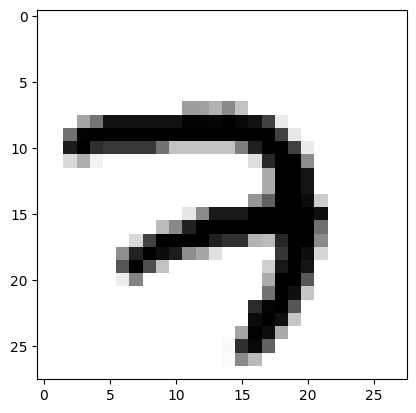

so nay la 7


In [20]:
hinh = train_images[5000]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()
print('so nay la',train_labels[5000])

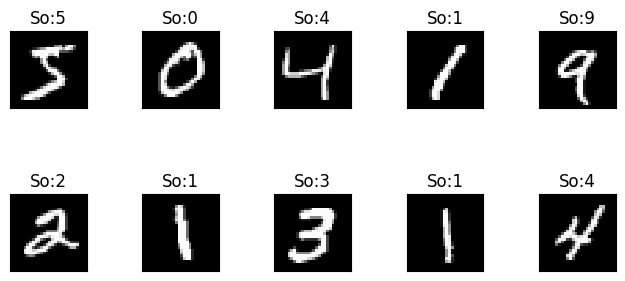

In [21]:
for i in range (10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap = 'gray', interpolation='none')
  plt.title('So:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [22]:
model = Sequential()
model.add(Dense(512,input_shape = (28*28,), activation='relu', name = "Layer_1"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())
# tạo mô hình mạng có 512 input và 10 output 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 Output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [24]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy', test_acc)
print('test loss', test_loss)
     

Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.2619 - accuracy: 0.9237
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1070 - accuracy: 0.9683
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0714 - accuracy: 0.9781
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0517 - accuracy: 0.9849
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0388 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0294 - accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0222 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0171 - accuracy: 0.9955
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0129 - accuracy: 0.9969
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy:

In [25]:
score = model.evaluate(test_images, test_labels, verbose=0)
print(score)

[0.06255808472633362, 0.9825000166893005]


ValueError: ignored

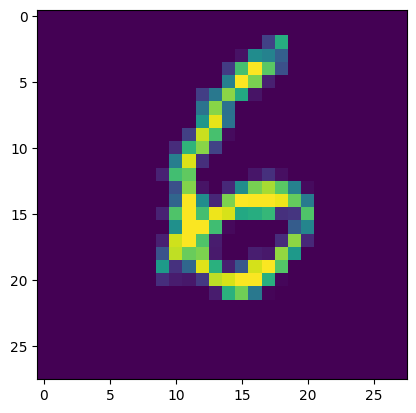

In [39]:
plt.imshow(test_images[2000].reshape(28,28))
y_predict = np.argmax(model.predict(test_images[2000].reshape(1,28,28,1)))
#reshape(1,28,28,1) số lượng ảnh, chiều cao, chiều rộng và số kênh màu (ở đây là 1 vì ảnh đen trắng)
print('Giá trị dự đoán: ', y_predict)

In [30]:
model.save('model1.h5')
     
model2 = load_model('model1.h5')
label1 = model2.predict(test_images[10])

ValueError: ignored

170498071/170498071 [==============================] - 2s 0us/step


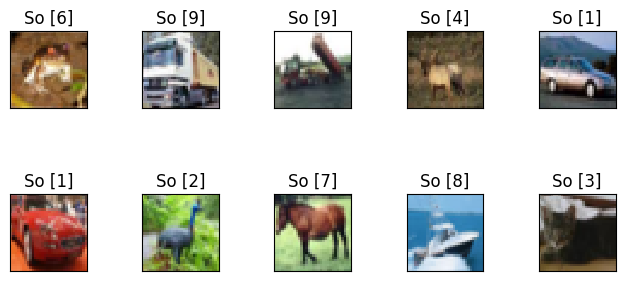

In [31]:
from keras.datasets import cifar10
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import *
from keras.layers import Dense

(X_train, y_train), (X_test, y_test ) = cifar10.load_data()

for i in range(10):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('So {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [40]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert class labels to one-hot encoded vectors
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Define the model architecture
model = Sequential()

# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, and 'relu' activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the previous layer
model.add(Flatten())

# Add a fully connected layer with 128 units and 'relu' activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 10 units and 'softmax' activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
# Train the model for 5 epochs with a batch size of 64
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/5
938/938 [==============================] - 35s 37ms/step - loss: 0.1873 - accuracy: 0.9442
Epoch 2/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0573 - accuracy: 0.9832
Epoch 3/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0377 - accuracy: 0.9888
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0264 - accuracy: 0.9922
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0371 - accuracy: 0.9882
Test accuracy: 0.9882000088691711


In [32]:
model = Sequential()
model.add(Dense(512,input_shape = (32*32*3,), activation='relu', name = "Layer_1"))
model.add(Dense(256,input_shape = (32*32*3,), activation='relu', name = "Layer_2"))
model.add(Dense(128,input_shape = (32*32*3,), activation='relu', name = "Layer_3"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
X_train = X_train.reshape((50000, 32*32*3))
X_trains = X_train.astype('float32')/255

X_test = X_test.reshape((10000, 32*32*3))
X_tests = X_test.astype('float32')/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
     

In [34]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_trains, y_train, epochs = 20, batch_size = 128)
test_loss, test_acc = model.evaluate(X_tests, y_test)
print('test accuracy', test_acc)
print('test loss', test_loss)

Epoch 1/20
391/391 [==============================] - 14s 34ms/step - loss: 2.0737 - accuracy: 0.2626
Epoch 2/20
391/391 [==============================] - 13s 34ms/step - loss: 1.7890 - accuracy: 0.3541
Epoch 3/20
391/391 [==============================] - 13s 34ms/step - loss: 1.6869 - accuracy: 0.3945
Epoch 4/20
391/391 [==============================] - 16s 40ms/step - loss: 1.6228 - accuracy: 0.4191
Epoch 5/20
391/391 [==============================] - 13s 34ms/step - loss: 1.5697 - accuracy: 0.4388
Epoch 6/20
391/391 [==============================] - 13s 34ms/step - loss: 1.5272 - accuracy: 0.4566
Epoch 7/20
391/391 [==============================] - 14s 35ms/step - loss: 1.4883 - accuracy: 0.4689
Epoch 8/20
391/391 [==============================] - 14s 35ms/step - loss: 1.4572 - accuracy: 0.4806
Epoch 9/20
391/391 [==============================] - 13s 34ms/step - loss: 1.4253 - accuracy: 0.4911
Epoch 10/20
391/391 [==============================] - 14s 36ms/step - loss: 1.403

In [37]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('apple-car-automotor.jpg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)
     

FileNotFoundError: ignored